In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [4]:
results_ref = pd.read_csv(
    "Reference.csv",
    #index_col=0,          # use first column as index
    #parse_dates=True      # automatically parse as datetime if possible
)

print(results_ref.index)  # will show a DatetimeIndex
print(results_ref.head())

RangeIndex(start=0, stop=731, step=1)
       Chatly        Kerki      Tyumen   Kazalinsk
0  960.650818   652.893738  510.625092  663.262207
1  557.142029  1158.306396  526.973694  659.031860
2  521.039001   901.389282  555.462708  690.934204
3  503.389343   923.129272  730.491943  645.639282
4  457.390289   429.521332  433.916565  572.089600


In [5]:
results_agri = pd.read_csv(
    "Scenario_no_agri.csv",
    #index_col=0,          # use first column as index
    #parse_dates=True      # automatically parse as datetime if possible
)

results_kwave = pd.read_csv(
    "RoutingWave.csv",
    #index_col=0,          # use first column as index
    #parse_dates=True      # automatically parse as datetime if possible
)

In [1]:
plt.figure(figsize=(12, 10))

plt.plot(results_ref.index, results_ref['Kerki'], label='Agriculture')
plt.plot(results_agri.index, results_agri['Kerki'], label='No Agriculture scenario')
plt.plot(results_kwave.index, results_kwave['Kerki'], label='Kinematic Wave')

plt.xlabel('Time')
plt.ylabel('Discharge at Kerki [m³/s]')
plt.title('Comparison of Kerki discharge across scenarios')
plt.legend()
plt.xlim(0,365)
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

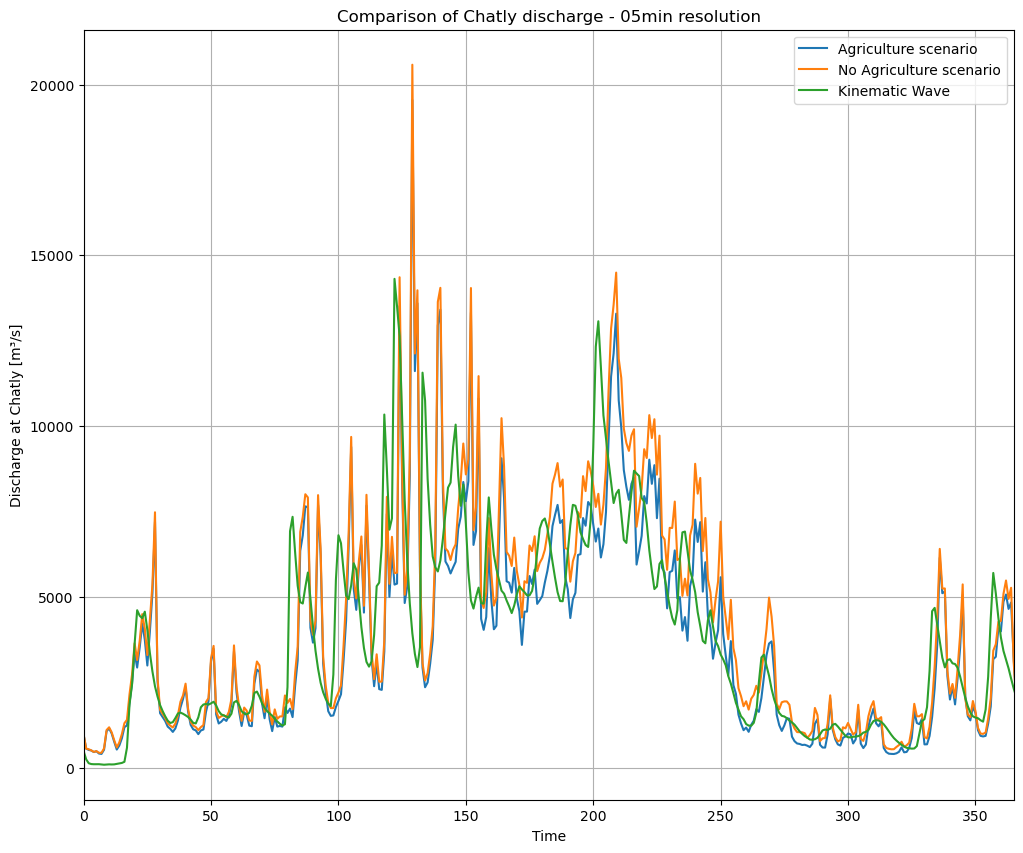

In [13]:
plt.figure(figsize=(12, 10))

plt.plot(results_ref.index, results_ref['Chatly'], label='Agriculture scenario')
plt.plot(results_agri.index, results_agri['Chatly'], label='No Agriculture scenario')
plt.plot(results_kwave.index, results_kwave['Chatly'], label='Kinematic Wave')

plt.xlabel('Time')
plt.ylabel('Discharge at Chatly [m³/s]')
plt.title('Comparison of Chatly discharge - 05min resolution')
plt.legend()
plt.xlim(0,365)
plt.grid(True)
plt.show()

<Axes: >

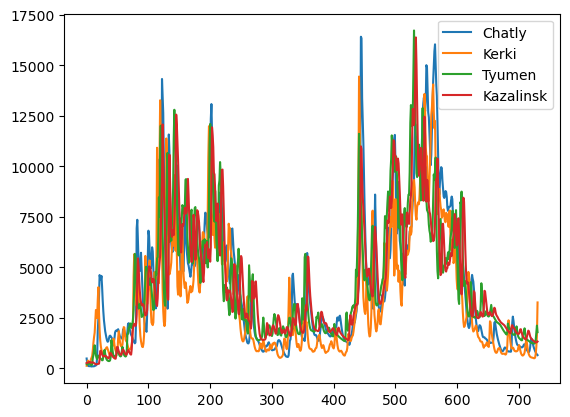

In [11]:
results_kwave.plot(label = results_kwave.columns)

In [29]:
results_2004_05 = pd.read_csv(
    "/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/Test_Balans_0419.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



In [30]:
results_2004_05.head()

,Chatly,Kerki,Tyumen,Kazalinsk
time,,,,
2004-01-01 00:00:00+00:00,960.650818,652.893738,510.625092,663.262207
2004-01-02 00:00:00+00:00,557.142029,1158.306396,526.973694,659.031860
2004-01-03 00:00:00+00:00,521.039001,901.389282,555.462708,690.934204
2004-01-04 00:00:00+00:00,503.389343,923.129272,730.491943,645.639282
2004-01-05 00:00:00+00:00,457.390289,429.521332,433.916565,572.089600


In [31]:
file_name = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/comparison_0530.nc'

In [32]:
ds_1 = xr.open_dataset(file_name)
print(ds_1)

<xarray.Dataset> Size: 758MB
Dimensions:    (time: 731, lat: 360, lon: 720)
Coordinates:
  * time       (time) datetime64[ns] 6kB 2004-01-01 2004-01-02 ... 2005-12-31
  * lat        (lat) float32 1kB 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 3kB -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables:
    discharge  (time, lat, lon) float32 758MB ...
Attributes:
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output, with human factors (non-natural)
    description:  PCR-GLOBWB run with human factors (non-natural) at 30 arcmi...


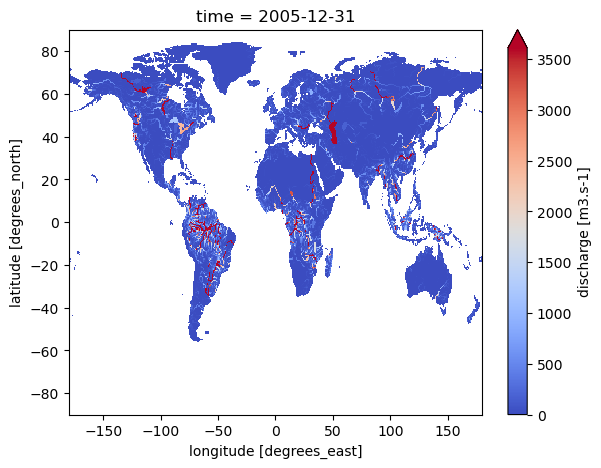

In [33]:
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=-1)


#da_1 = ds_1[0].isel(time =-1)


da_1.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

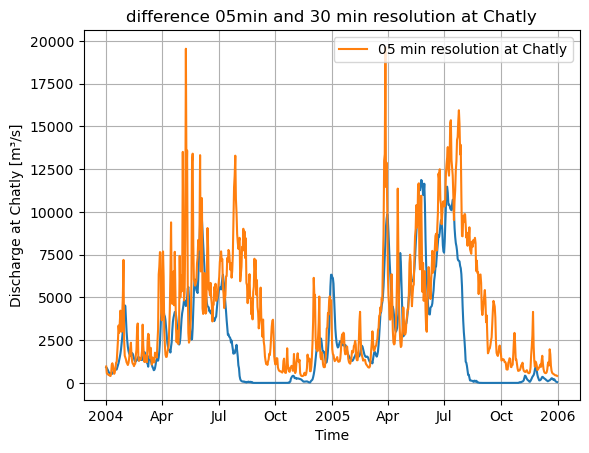

In [ ]:
da_slice = ds_1[first_var].sel(lat=41.84,lon=60.52, method="nearest")
da_slice.plot()
subset = results_2004_05.loc['2004':'2005']
plt.plot(subset.index, subset['Chatly'], label='05 min resolution at Chatly')
plt.title('difference 05min and 30 min resolution at Chatly')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge at Chatly [m³/s]')
plt.grid(True)
plt.show()
#plt.plot(results_2004_05['Chatly'], label='Observed discharge at Chatly')


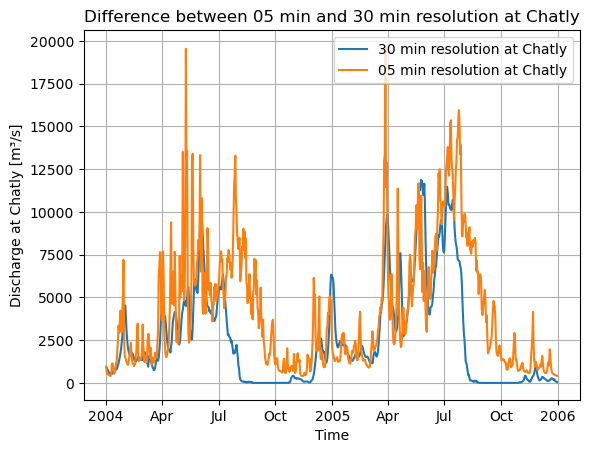

In [40]:
# Plot the xarray slice (with label)
da_slice.plot(label='30 min resolution at Chatly')

# Plot the pandas subset (2004–2005)
subset = results_2004_05.loc['2004':'2005']
plt.plot(subset.index, subset['Chatly'], label='05 min resolution at Chatly')

# Formatting
plt.title('Difference between 05 min and 30 min resolution at Chatly')
plt.xlabel('Time')
plt.ylabel('Discharge at Chatly [m³/s]')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from ewatercycle.observation.grdc import get_grdc_data

ds = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')
ds

<xarray.Dataset> Size: 223kB
Dimensions:              (time: 13880)
Coordinates:
  * time                 (time) datetime64[ns] 111kB 1936-01-01 ... 1973-12-31
    id                   int64 8B 2817100
Data variables:
    streamflow           (time) float64 111kB 688.0 664.0 614.0 ... 153.0 158.0
    area                 float64 8B 4.5e+05
    country              <U2 8B 'UZ'
    geo_x                float64 8B 59.7
    geo_y                float64 8B 42.28
    geo_z                float64 8B 72.0
    owneroforiginaldata  <U85 340B 'Initial dataset collected in the framewor...
    river_name           <U9 36B 'AMU DARYA'
    station_name         <U6 24B 'CHATLY'
    timezone             float64 8B nan
Attributes:
    title:          NA
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Converted from 2817100_Q_Day.Cmd.txt of 2025-09-02 to net...
    missing_value:  -999.000

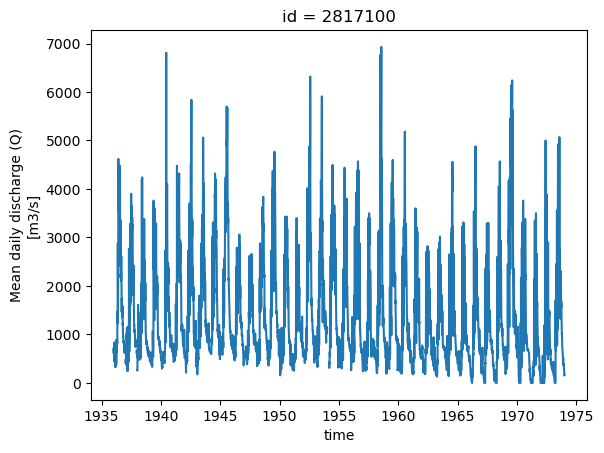

In [7]:
#results.loc['Kerki'].plot(label = 'PCR-GLOBWB Kerki')
ds['streamflow'].sel(time=slice('1900', '2000')).plot(label='GRDC Kerki')
